In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

card_df = pd.read_csv('/Users/hunman89/Downloads/creditcard.csv')
card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
from sklearn.model_selection import train_test_split

def get_processed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

def get_train_test_dataset(df=None):
    df_copy = get_processed_df(df)
    X_feature = df_copy.iloc[:,:-1]
    y_label = df_copy.iloc[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(X_feature, y_label, test_size=0.3,
                                                        random_state=0, stratify=y_label)
    return X_train, X_test, y_train, y_test

In [12]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print(y_train.value_counts()/y_train.shape[0] * 100)
print(y_test.value_counts()/y_test.shape[0] * 100)

0    99.827451
1     0.172549
Name: Class, dtype: float64
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [13]:
from util import get_clf_eval

In [14]:
from sklearn.linear_model import LogisticRegression

ir_clf = LogisticRegression(max_iter=1000)
ir_clf.fit(X_train, y_train)
get_clf_eval(y_test, ir_clf.predict(X_test), ir_clf.predict_proba(X_test)[:,1])

오차행렬
[[85281    14]
 [   58    90]]
accuracy: 0.9992, precicion: 0.8654, recall: 0.6081, F1: 0.7143, AUC: 0.9703


In [18]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    get_clf_eval(tgt_test, model.predict(ftr_test), model.predict_proba(ftr_test)[:,1])

In [19]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

오차행렬
[[85290     5]
 [   36   112]]
accuracy: 0.9995, precicion: 0.9573, recall: 0.7568, F1: 0.8453, AUC: 0.9790


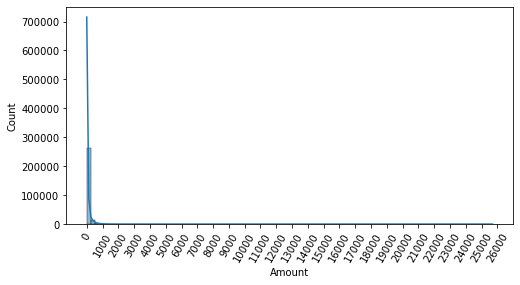

In [20]:
import seaborn as sns

plt.figure(figsize=(8,4))
plt.xticks(range(0,30000,1000), rotation=60)
sns.histplot(card_df['Amount'], bins=100, kde=True)
plt.show()

In [38]:
from sklearn.preprocessing import StandardScaler

def get_processed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

lr_clf = LogisticRegression(max_iter=1000)
get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

오차행렬
[[85281    14]
 [   58    90]]
accuracy: 0.9992, precicion: 0.8654, recall: 0.6081, F1: 0.7143, AUC: 0.9702
오차행렬
[[85290     5]
 [   37   111]]
accuracy: 0.9995, precicion: 0.9569, recall: 0.7500, F1: 0.8409, AUC: 0.9779


In [39]:
def get_processed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

오차행렬
[[85283    12]
 [   59    89]]
accuracy: 0.9992, precicion: 0.8812, recall: 0.6014, F1: 0.7149, AUC: 0.9727
오차행렬
[[85290     5]
 [   35   113]]
accuracy: 0.9995, precicion: 0.9576, recall: 0.7635, F1: 0.8496, AUC: 0.9796


<AxesSubplot:>

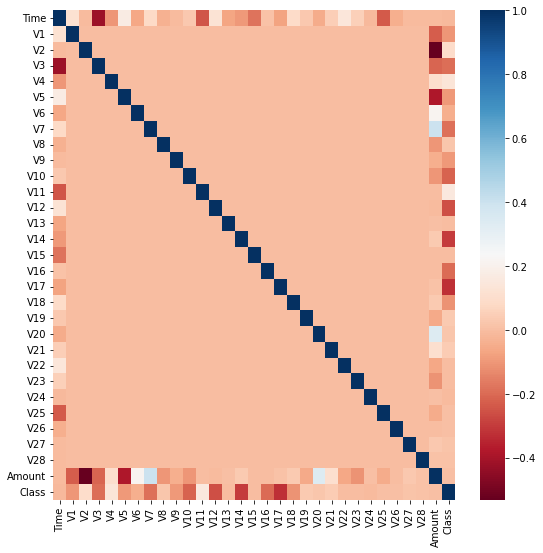

In [31]:
plt.figure(figsize=(9,9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

In [33]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    fraud = df[df['Class']==1][column]
    q_25 = np.percentile(fraud.values,25)
    q_75 = np.percentile(fraud.values,75)
    iqr = q_75 - q_25
    iqr_w = iqr*weight
    low_val = q_25 - iqr_w
    h_val = q_75 + iqr_w
    out_index = fraud[(fraud < low_val)|(fraud > h_val)].index
    return out_index

print(get_outlier(card_df, 'V14'))

Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [40]:
def get_processed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    df_copy.drop(get_outlier(card_df, 'V14'), axis=0, inplace=True)
    df_copy.drop(get_outlier(card_df, 'V17'), axis=0, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

오차행렬
[[85281    14]
 [   48    98]]
accuracy: 0.9993, precicion: 0.8750, recall: 0.6712, F1: 0.7597, AUC: 0.9743
오차행렬
[[85290     5]
 [   25   121]]
accuracy: 0.9996, precicion: 0.9603, recall: 0.8288, F1: 0.8897, AUC: 0.9780


In [42]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_tr_ov, y_tr_ov = smote.fit_resample(X_train, y_train)
print(pd.Series(y_train).value_counts())
print(pd.Series(y_tr_ov).value_counts())

0    199020
1       342
Name: Class, dtype: int64
0    199020
1    199020
Name: Class, dtype: int64


In [43]:
get_model_train_eval(lr_clf, X_tr_ov, X_test, y_tr_ov, y_test)

오차행렬
[[82937  2358]
 [   11   135]]
accuracy: 0.9723, precicion: 0.0542, recall: 0.9247, F1: 0.1023, AUC: 0.9737


In [44]:
get_model_train_eval(lgbm_clf, X_tr_ov, X_test, y_tr_ov, y_test)

오차행렬
[[85283    12]
 [   22   124]]
accuracy: 0.9996, precicion: 0.9118, recall: 0.8493, F1: 0.8794, AUC: 0.9814
